In [1]:
from _lineage_benchmark_utils import do_op_lineage_benchmarks
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    
def benchmark_op_instrumentation_lineage():
    print("Instrumentation Results for Lineage")
    mean_benchmark_results = {}
    mean_benchmark_results["row_number"] = []
    mean_benchmark_results["repeats"] = []

    for row_number in row_numbers:
        mean_benchmark_results["row_number"].append(row_number)
        mean_benchmark_results["repeats"].append(repeats)
        benchmark_results = do_op_lineage_benchmarks(row_number, repeats)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    return pd.DataFrame(mean_benchmark_results)
    


In [3]:
#row_numbers = [1000, 10000]
#row_numbers = [1000, 10000, 100000]
row_numbers = [1000, 10000, 100000, 1000000]

#repeats = 2
repeats = 10
#repeats = 15
#repeats = 30


In [4]:
lineage_results = benchmark_op_instrumentation_lineage()
filepath = f"./figures/optimized-inspection-bencharks-lineage.csv"
lineage_results.to_csv(filepath, index=False)

Instrumentation Results for Lineage
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
optimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
unoptimized mode
u

In [5]:
filepath = f"./figures/optimized-inspection-bencharks-lineage.csv"
lineage_df = pd.read_csv(filepath)
lineage_df

,row_number,repeats,dropna orig,dropna old,dropna new,join orig,join old,join new,one-hot orig,one-hot old,one-hot new
0,1000,10,0.001811,0.011097,0.003516,0.002012,0.027806,0.047719,0.000909,0.003952,0.002064
1,10000,10,0.002808,0.033254,0.006026,0.008311,0.094985,0.127881,0.002384,0.027763,0.009206
2,100000,10,0.017507,0.263201,0.041897,0.022221,0.656137,0.785815,0.018322,0.188667,0.055950
3,1000000,10,0.159317,2.632882,0.448327,0.381181,7.146722,5.081871,0.190905,1.810067,0.619801


In [6]:
def plot_overhead(orig, #old_histogram, new_histogram, 
                  old_lineage, new_lineage, run_row_numbers, title):
    
    markersize = 12

    #plt.plot(1.0 / epsilons, adult_means / np.min(adult_means), 'o-', markersize=markersize)

    plt.plot(run_row_numbers, np.array(orig) * 1000, linestyle='dotted', color='grey')
    #plt.plot(run_row_numbers, np.array(old_histogram) * 1000, linestyle='dashed', color='tab:blue')
    #plt.plot(run_row_numbers, np.array(new_histogram) * 1000, color='tab:blue')
    plt.plot(run_row_numbers, np.array(old_lineage) * 1000, linestyle='dashed', color='tab:orange')
    plt.plot(run_row_numbers, np.array(new_lineage) * 1000, color='tab:orange')

    #plt.ylim((0.9, 5.999))

    plt.ylabel('runtime (ms)', fontsize=26)
    plt.xlabel('# rows', fontsize=26)
    plt.legend(['no instrumentation', #'hist', 'hist (opt)', 
                'provenance', 'provenance (opt.)'], loc='upper left',
               #, title="inspections", title_fontsize=16,
               fontsize=20, ncol=1)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    plt.xticks(run_row_numbers[1:], rotation=45, fontsize=24)

    plt.yscale('log')
    plt.xscale('log')


    #plt.title(title, fontsize=26)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

In [7]:
filepath = f"./figures/optimized-inspection-bencharks-lineage.csv"
lineage_df = pd.read_csv(filepath)

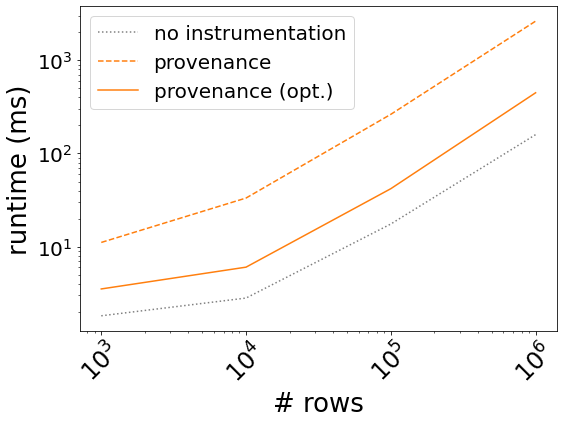

In [8]:
#dropna
plot_overhead(lineage_df["dropna orig"],
              lineage_df["dropna old"],
              lineage_df["dropna new"],
              lineage_df["row_number"],
              "dropna-hist-lineage")

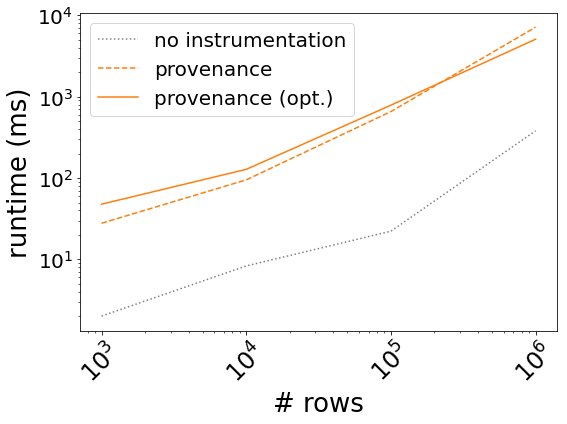

In [9]:
# join
plot_overhead(lineage_df["join orig"],
              #histogram_df["join old"],
              #histogram_df["join new"],
              lineage_df["join old"],
              lineage_df["join new"],
              lineage_df["row_number"],
              "join-hist-lineage")

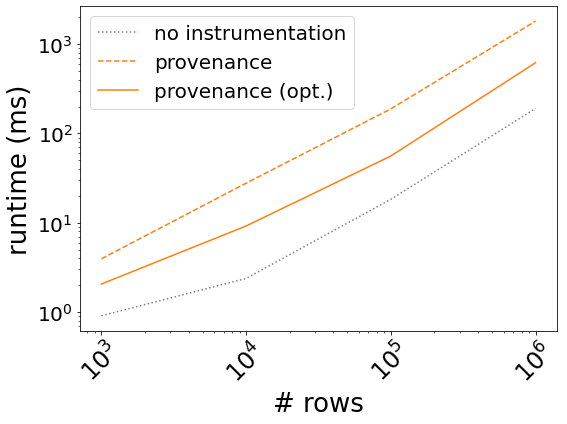

In [10]:
# one-hot
plot_overhead(lineage_df["one-hot orig"],
              #histogram_df["one-hot old"],
              #histogram_df["one-hot new"],
              lineage_df["one-hot old"],
              lineage_df["one-hot new"],
              lineage_df["row_number"],
              "one-hot-hist-lineage")